In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\Visual Studio\Dataset Tugas MBC\Week 4\Cluster\marketing_campaign.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_2236\18506481.py:1: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv('D:\Visual Studio\Dataset Tugas MBC\Week 4\Cluster\marketing_campaign.csv', sep='\t')


In [4]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
df.columns = df.columns.str.lower()

df.duplicated().sum(), df.isna().sum()

(np.int64(0),
 id                      0
 year_birth              0
 education               0
 marital_status          0
 income                 24
 kidhome                 0
 teenhome                0
 dt_customer             0
 recency                 0
 mntwines                0
 mntfruits               0
 mntmeatproducts         0
 mntfishproducts         0
 mntsweetproducts        0
 mntgoldprods            0
 numdealspurchases       0
 numwebpurchases         0
 numcatalogpurchases     0
 numstorepurchases       0
 numwebvisitsmonth       0
 acceptedcmp3            0
 acceptedcmp4            0
 acceptedcmp5            0
 acceptedcmp1            0
 acceptedcmp2            0
 complain                0
 z_costcontact           0
 z_revenue               0
 response                0
 dtype: int64)

In [6]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')


In [7]:
df['age'] = 2023 - df['year_birth']

df['status'] = df['marital_status'].replace({'Married': 1, 'Together': 1, 'Single': 0, 'Divorced': 0, 'Widow': 0, 'Alone': 0, 'Absurd': 0, 'YOLO': 0})

df['child'] = df['kidhome'] + df['teenhome']

df['fam_members'] = (df['status'] + 1) + df['child']

df['education'] = df['education'].replace({'Basic': 0, '2n Cycle': 0, 'Graduation': 1, 'Master': 2, 'PhD': 2})

df['spend'] = df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldprods']

df = df.rename(columns={'mntwines': 'wines', 'mntfruits': 'fruits', 'mntmeatproducts': 'meat', 'mntfishproducts': 'fish', 'mntsweetproducts': 'sweets', 'mntgoldprods': 'gold'})

to_drop = ["marital_status", "dt_customer", "z_costcontact", "z_revenue", "year_birth", "id"]
df = df.drop(to_drop, axis=1)

C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_2236\513626174.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status'] = df['marital_status'].replace({'Married': 1, 'Together': 1, 'Single': 0, 'Divorced': 0, 'Widow': 0, 'Alone': 0, 'Absurd': 0, 'YOLO': 0})
C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_2236\513626174.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({'Basic': 0, '2n Cycle': 0, 'Graduation': 1, 'Master': 2, 'PhD': 2})


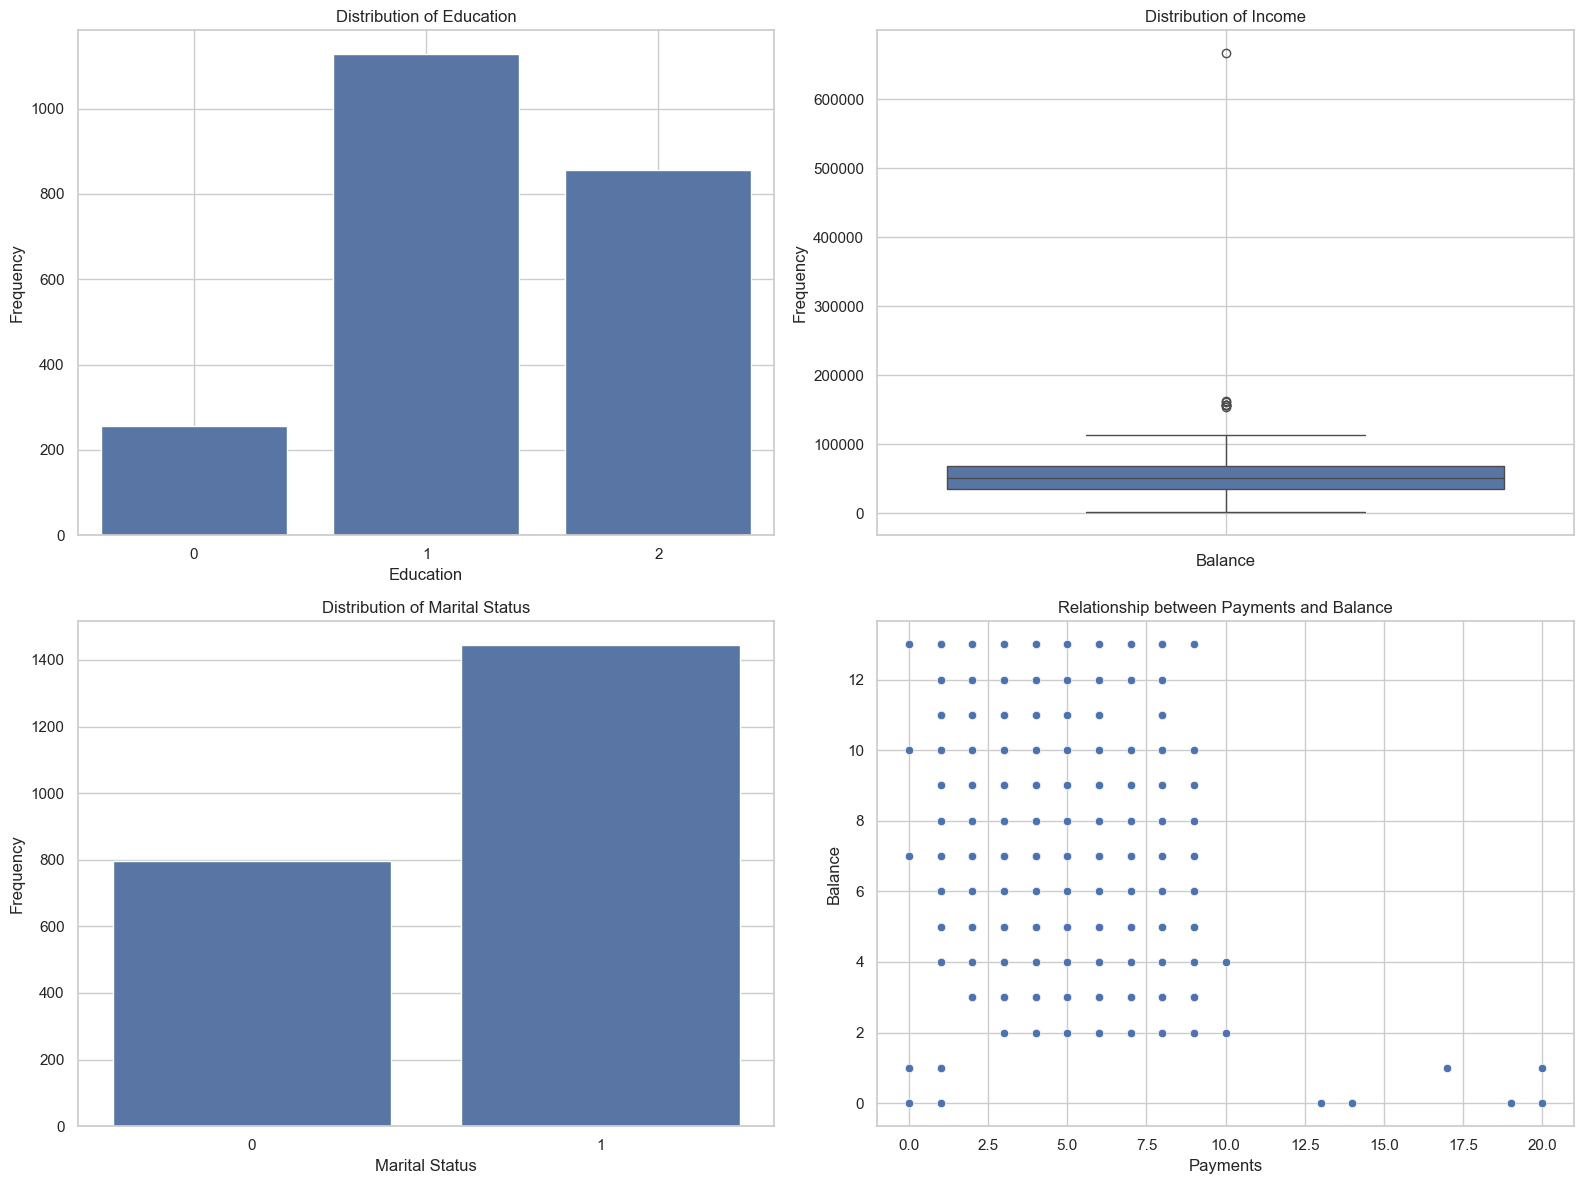

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.countplot(x=df['education'])
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.grid(True)


plt.subplot(2, 2, 2)
sns.boxplot(df['income'])
plt.title('Distribution of Income')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)


plt.subplot(2, 2, 3)
sns.countplot(x=df['status'])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.scatterplot(x='numwebvisitsmonth', y='numstorepurchases', data=df)
plt.title('Relationship between Payments and Balance')
plt.xlabel('Payments')
plt.ylabel('Balance')


plt.tight_layout()

plt.show()

In [9]:
# Checking the missing values
missing_values = df.isnull().sum()

# For simplicity, filling missing values with the mean of the column
df['income'].fillna(df['income'].mean(), inplace=True)

C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_2236\4029442727.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].mean(), inplace=True)


In [10]:
IQR = df['income'].quantile(0.75) - df['income'].quantile(0.25)
IQR

np.float64(32751.0)

In [11]:
Higher_outlier = df['income'].quantile(0.75) + (IQR * 1.5)
lower_outlier = df['income'].quantile(0.25) - (IQR * 1.5)
print(Higher_outlier)
print(lower_outlier)

117416.25
-13587.75


In [12]:
df = df[(df["age"]<90)]
for x in df.index:
    if df.loc[x, 'income'] > Higher_outlier:
        df.drop(x, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2229 non-null   int64  
 1   income               2229 non-null   float64
 2   kidhome              2229 non-null   int64  
 3   teenhome             2229 non-null   int64  
 4   recency              2229 non-null   int64  
 5   wines                2229 non-null   int64  
 6   fruits               2229 non-null   int64  
 7   meat                 2229 non-null   int64  
 8   fish                 2229 non-null   int64  
 9   sweets               2229 non-null   int64  
 10  gold                 2229 non-null   int64  
 11  numdealspurchases    2229 non-null   int64  
 12  numwebpurchases      2229 non-null   int64  
 13  numcatalogpurchases  2229 non-null   int64  
 14  numstorepurchases    2229 non-null   int64  
 15  numwebvisitsmonth    2229 non-null   int64 

In [13]:
cols_del = ['acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1','acceptedcmp2', 'complain', 'response']
df = df.drop(cols_del, axis=1)

In [14]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'O']
numeric_cols

['education',
 'income',
 'kidhome',
 'teenhome',
 'recency',
 'wines',
 'fruits',
 'meat',
 'fish',
 'sweets',
 'gold',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'age',
 'status',
 'child',
 'fam_members',
 'spend']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

2 32903.053940895334
3 29624.287035264453
4 26722.1438733199
5 25680.640627593486
6 24487.783792873237
7 23792.480788018594
8 23335.892768473142
9 22704.92639307252


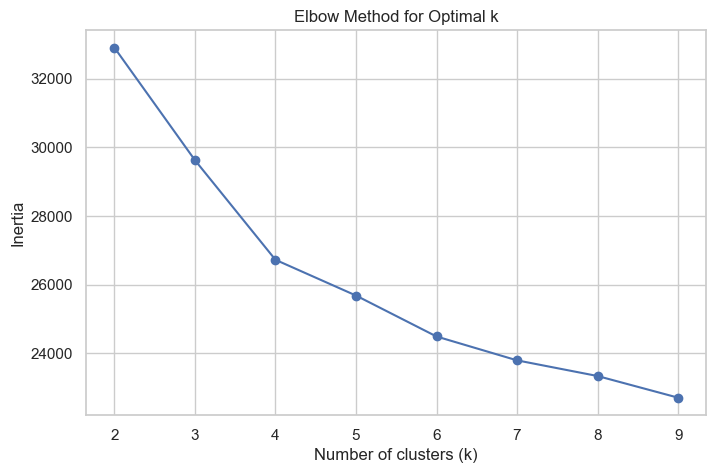

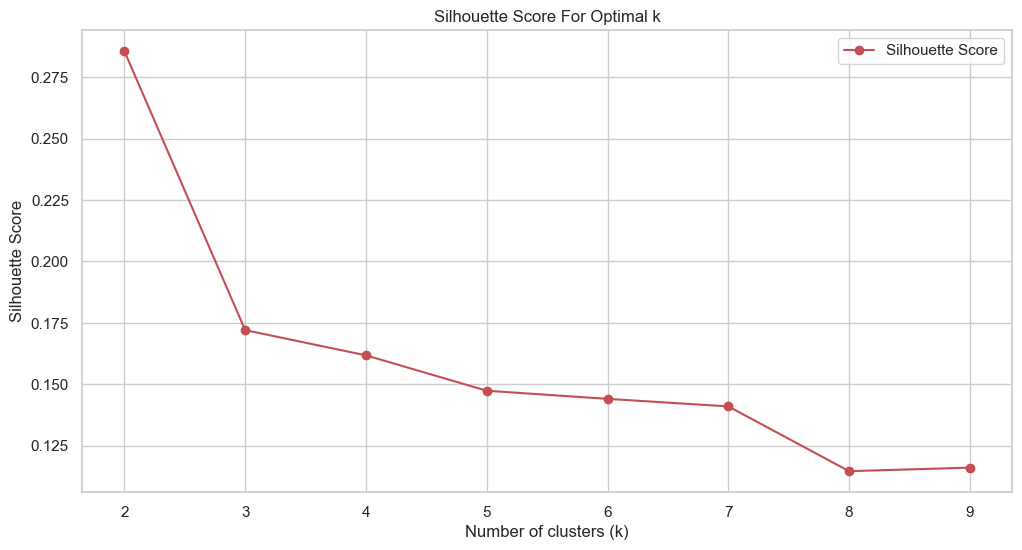

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


inertia = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    innertia = kmeans.inertia_
    inertia.append(innertia)
    print(k, innertia)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.legend()
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(features_scaled)
df['cluster'] = kmeans.labels_

C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_2236\1953229411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['cluster'], palette='coolwarm')
C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_2236\1953229411.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='income', data=df, palette='coolwarm')


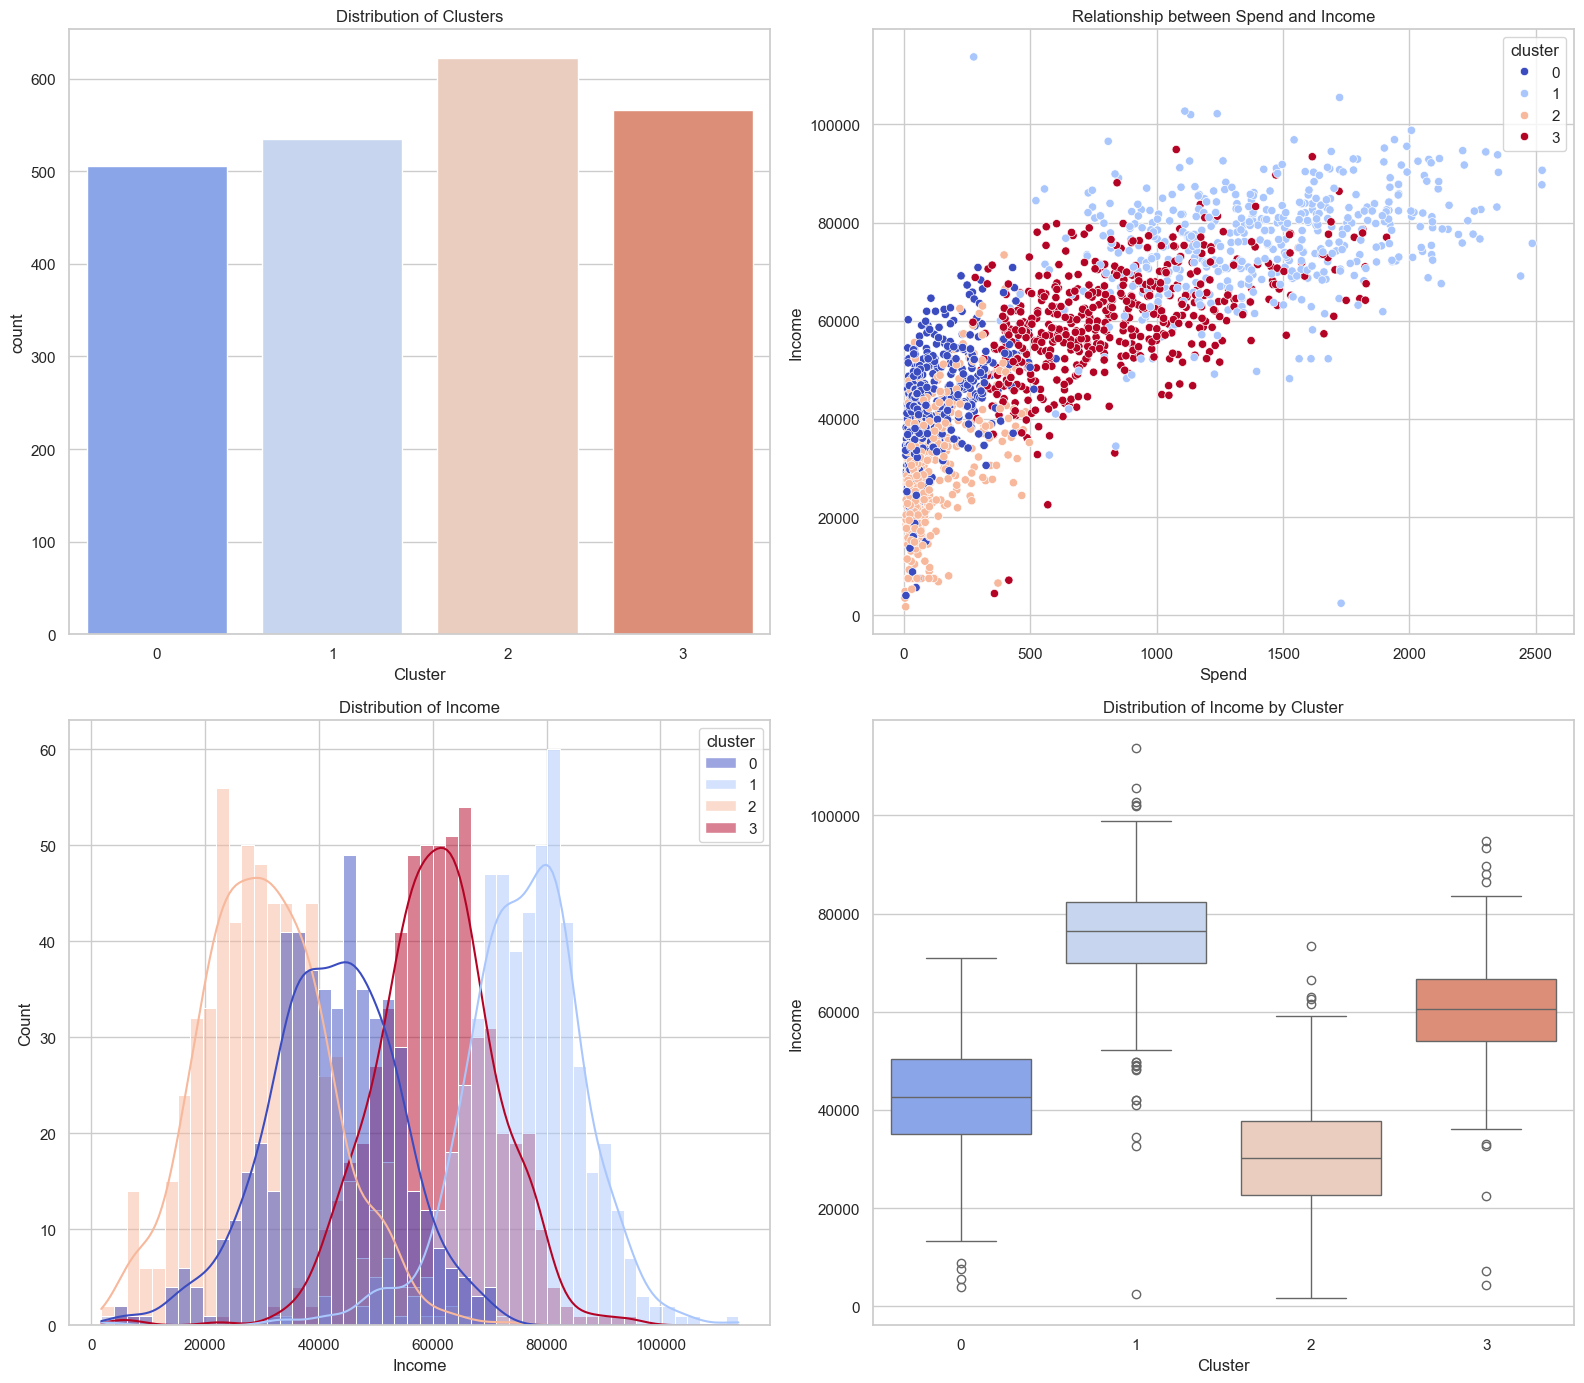

In [18]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
sns.countplot(x=df['cluster'], palette='coolwarm')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')

plt.subplot(2, 2, 2)
sns.scatterplot(x='spend', y='income', hue='cluster', data=df, palette='coolwarm')
plt.title('Relationship between Spend and Income')
plt.xlabel('Spend')
plt.ylabel('Income')

plt.subplot(2, 2, 3)
sns.histplot(x='income', bins=50, hue='cluster', data=df, kde=True, palette='coolwarm')
plt.title('Distribution of Income')
plt.xlabel('Income')


plt.subplot(2, 2, 4)
sns.boxplot(x='cluster', y='income', data=df, palette='coolwarm')
plt.title('Distribution of Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')


plt.tight_layout()

plt.show()

In [19]:
import pickle

with open("model_cluster.pkl", "wb") as model_cluster:
  pickle.dump(kmeans, model_cluster)

with open("scaler_cluster.pkl", "wb") as f:
  pickle.dump(scaler, f)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2229 non-null   int64  
 1   income               2229 non-null   float64
 2   kidhome              2229 non-null   int64  
 3   teenhome             2229 non-null   int64  
 4   recency              2229 non-null   int64  
 5   wines                2229 non-null   int64  
 6   fruits               2229 non-null   int64  
 7   meat                 2229 non-null   int64  
 8   fish                 2229 non-null   int64  
 9   sweets               2229 non-null   int64  
 10  gold                 2229 non-null   int64  
 11  numdealspurchases    2229 non-null   int64  
 12  numwebpurchases      2229 non-null   int64  
 13  numcatalogpurchases  2229 non-null   int64  
 14  numstorepurchases    2229 non-null   int64  
 15  numwebvisitsmonth    2229 non-null   int64 

In [21]:
cols = ['age', 'income', 'spend', 'recency', 'kidhome', 'teenhome', 'fish', 'wines', 'fruits', 'meat', 'sweets', 'gold', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']
for cols in numeric_cols:
    print(f'Kolom: {cols}')
    print(f'Max Value: {df[cols].max()}')
    print(f'Min Value: {df[cols].min()}')
    print('-'*50)

Kolom: education
Max Value: 2
Min Value: 0
--------------------------------------------------
Kolom: income
Max Value: 113734.0
Min Value: 1730.0
--------------------------------------------------
Kolom: kidhome
Max Value: 2
Min Value: 0
--------------------------------------------------
Kolom: teenhome
Max Value: 2
Min Value: 0
--------------------------------------------------
Kolom: recency
Max Value: 99
Min Value: 0
--------------------------------------------------
Kolom: wines
Max Value: 1493
Min Value: 0
--------------------------------------------------
Kolom: fruits
Max Value: 199
Min Value: 0
--------------------------------------------------
Kolom: meat
Max Value: 1725
Min Value: 0
--------------------------------------------------
Kolom: fish
Max Value: 259
Min Value: 0
--------------------------------------------------
Kolom: sweets
Max Value: 263
Min Value: 0
--------------------------------------------------
Kolom: gold
Max Value: 362
Min Value: 0
-----------------------

In [22]:
df.head()

,education,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweets,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,status,child,fam_members,spend,cluster
0,1,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,66,0,0,1,1617,1
1,1,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,69,0,2,3,27,0
2,1,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,58,1,0,2,776,1
3,1,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,39,1,1,3,53,2
4,2,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,42,1,1,3,422,3


In [24]:
df.drop(['cluster'], axis=1, inplace=True)
df.to_csv('data_cluster.csv', index=False)